In [3]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df = pd.read_csv('data/clean/cleaned_parkrun.csv')
filt_df = pd.read_csv('data/clean/cleaned_parkrun_no_outliers.csv')
event_df = pd.read_csv('data/clean/event_data.csv')
runner_df = pd.read_csv('data/clean/runner_stats.csv')

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
filt_df['Date'] = pd.to_datetime(filt_df['Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157970 entries, 0 to 157969
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     157970 non-null  datetime64[ns]
 1   Position                 157970 non-null  int64         
 2   Position_score           157970 non-null  float64       
 3   Name                     157970 non-null  object        
 4   Runner_id                157970 non-null  int64         
 5   Parkrun_count            157970 non-null  int64         
 6   Gender                   157970 non-null  object        
 7   Age_group                157970 non-null  object        
 8   Time_in_minutes          157970 non-null  float64       
 9   temperature              157970 non-null  float64       
 10  windspeed                157970 non-null  float64       
 11  precipitation            157970 non-null  float64       
 12  Total_Appearance

In [5]:
df.describe()

,Date,Position,Position_score,Runner_id,Parkrun_count,Time_in_minutes,temperature,windspeed,precipitation,Total_Appearances,Appearance_Instance,Days_since_last_parkrun,Total_event_runners,PB_mins,ave_mins,prev_run_time,prev_PB,avg_prev_run_times
count,157970,157970.000000,157970.000000,1.579700e+05,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000,157970.000000
mean,2017-01-16 17:37:40.272203264,192.520725,0.501975,1.183994e+06,163.115452,27.104793,11.534113,21.619822,0.089890,136.982560,69.027872,54.025157,382.749471,24.121384,27.141846,27.131862,24.788140,26.950548
min,2007-11-10 00:00:00,1.000000,0.000000,7.650000e+02,2.000000,14.580000,-2.400000,1.800000,0.000000,2.000000,2.000000,1.000000,14.000000,14.580000,14.715000,14.850000,14.850000,14.850000
25%,2013-07-13 00:00:00,92.000000,0.261176,4.919300e+04,35.000000,23.330000,7.800000,13.200000,0.000000,30.000000,11.000000,7.000000,343.000000,21.000000,23.670482,23.350000,21.580000,23.508846
50%,2016-10-29 00:00:00,183.000000,0.504448,2.123450e+05,110.000000,26.420000,11.800000,20.600000,0.000000,88.000000,34.000000,14.000000,391.000000,23.630000,26.655000,26.450000,24.200000,26.450000
75%,2020-01-11 00:00:00,282.000000,0.741026,1.201449e+06,254.000000,29.870000,15.700000,28.800000,0.000000,210.000000,94.000000,28.000000,434.000000,26.450000,29.754762,29.900000,27.280000,29.610789
max,2024-12-07 00:00:00,858.000000,1.000000,1.028610e+07,722.000000,82.230000,25.900000,60.500000,3.500000,701.000000,701.000000,5005.000000,859.000000,66.030000,68.760000,82.230000,71.980000,71.980000
std,NaN,119.819602,0.281510,1.997095e+06,157.943160,5.447611,5.238020,10.948821,0.311865,138.046045,87.867329,195.631321,93.378019,4.157925,4.764686,5.448326,4.485454,4.764172


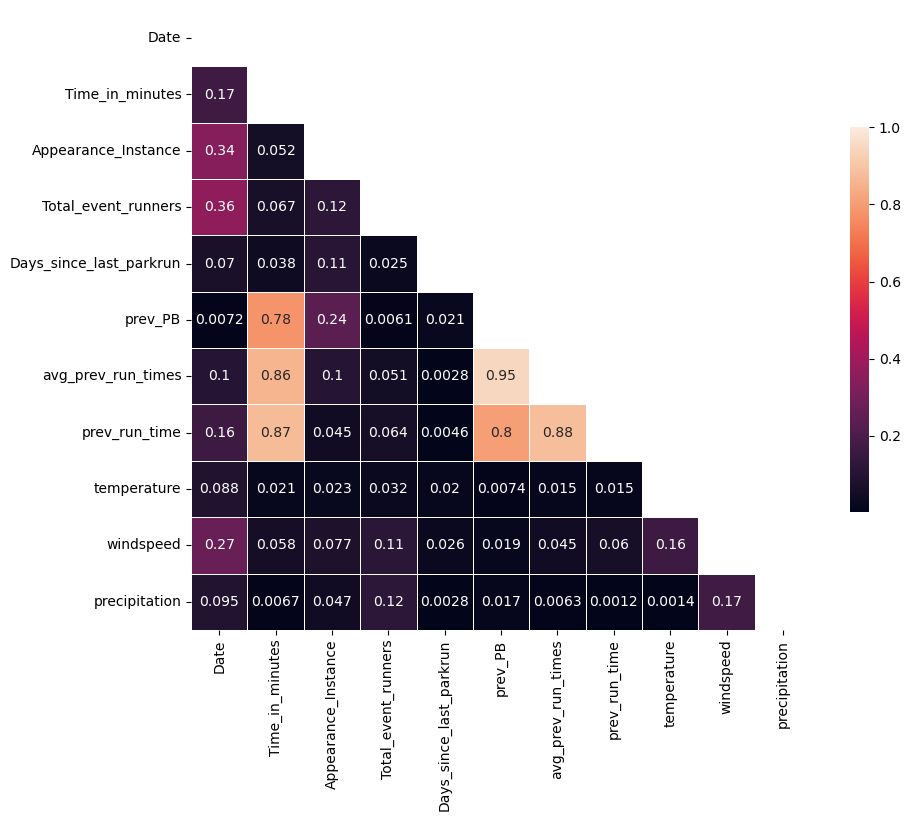

In [6]:
corr=np.abs(df[['Date', 
                'Time_in_minutes',
                'Appearance_Instance',
                'Total_event_runners',
                'Days_since_last_parkrun',
                'prev_PB',
                'avg_prev_run_times',
                'prev_run_time',
                'temperature',
                'windspeed',
                'precipitation']].corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

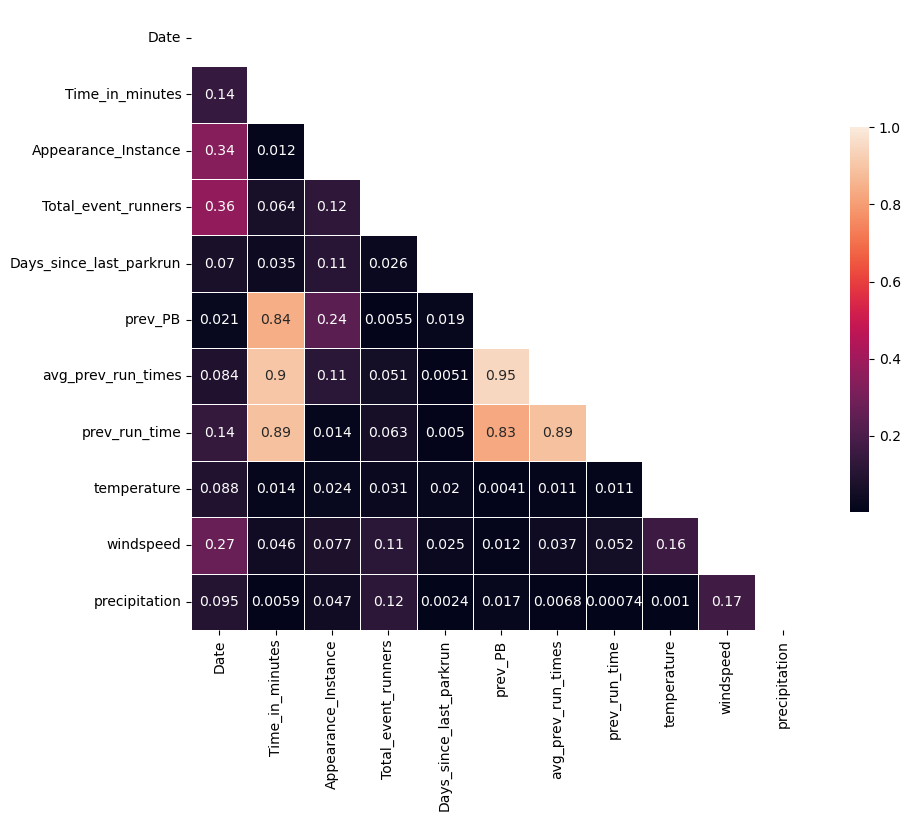

In [34]:
corr=np.abs(filt_df[['Date', 
                'Time_in_minutes',
                'Appearance_Instance',
                'Total_event_runners',
                'Days_since_last_parkrun',
                'prev_PB',
                'avg_prev_run_times',
                'prev_run_time',
                'temperature',
                'windspeed',
                'precipitation']].corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [8]:
df['is_PB'] = df['PB_mins'] == df['Time_in_minutes']

In [9]:
df['Appearance/Total'] = (df['Appearance_Instance']-1)/(df['Total_Appearances']-1)

In [10]:
df.groupby('is_PB')['Appearance/Total'].mean()

is_PB
False    0.516225
True     0.692771
Name: Appearance/Total, dtype: float64

In [11]:
def temp_bins(df):
    bins = [-5, 0, 5, 10, 15, 20, 25, 30]  # Adjust based on your data
    df['temp_bins'] = pd.cut(df['temperature'], bins=bins)
    return df

In [12]:
df = temp_bins(df)

df['temp_bins'].unique()

[(10, 15], (5, 10], (0, 5], (15, 20], (-5, 0], (20, 25], (25, 30]]
Categories (7, interval[int64, right]): [(-5, 0] < (0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25] < (25, 30]]

C:\Users\olgeo\AppData\Local\Temp\ipykernel_20628\1665542284.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_temp = df.groupby('temp_bins')['Time_in_minutes'].mean()


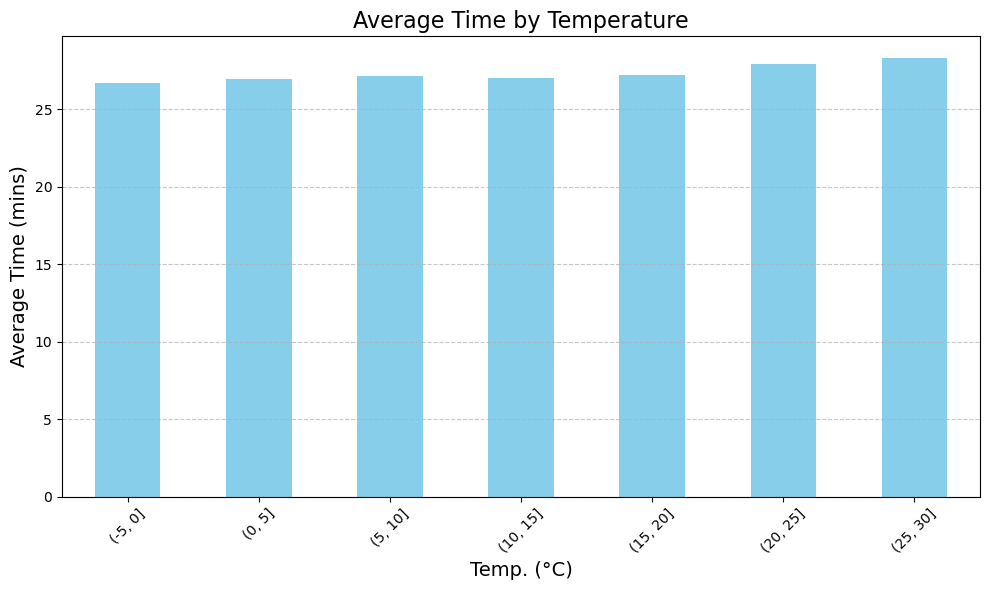

In [13]:
# Calculate the average time per temperature bin
avg_time_by_temp = df.groupby('temp_bins')['Time_in_minutes'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_time_by_temp.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Time by Temperature', fontsize=16)
plt.xlabel('Temp. (°C)', fontsize=14)
plt.ylabel('Average Time (mins)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

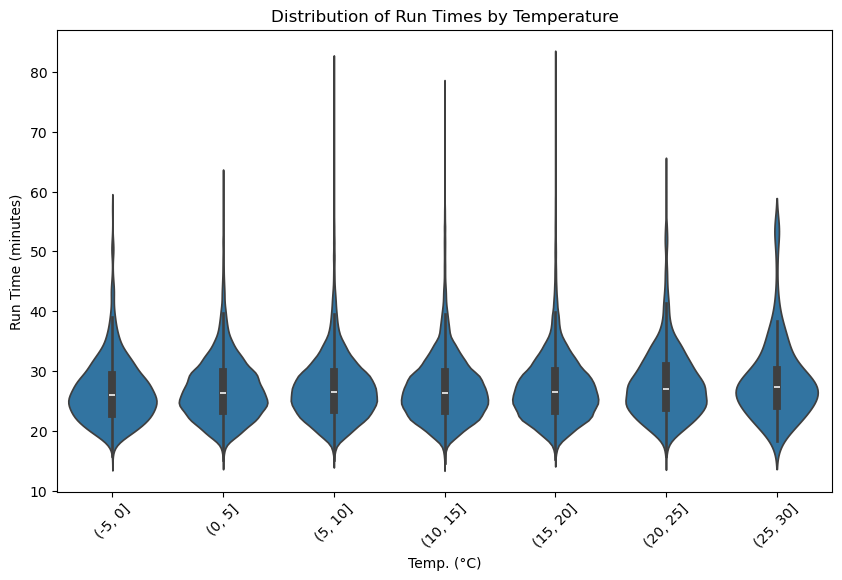

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='temp_bins', y='Time_in_minutes', data=df)  # Use 'Temperature_range' if binned
plt.title('Distribution of Run Times by Temperature')
plt.xlabel('Temp. (°C)')
plt.ylabel('Run Time (minutes)')
plt.xticks(rotation=45)
plt.show()

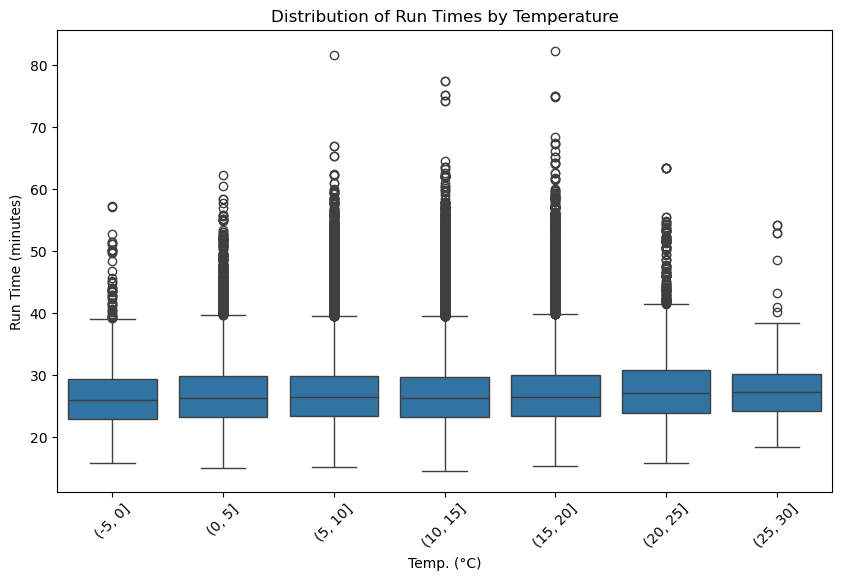

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp_bins', y='Time_in_minutes', data=df)  # Use 'Temperature_range' if binned
plt.title('Distribution of Run Times by Temperature')
plt.xlabel('Temp. (°C)')
plt.ylabel('Run Time (minutes)')
plt.xticks(rotation=45)
plt.show()

In [16]:
def precip_bins(df):
    bins = [0, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0]
    labels = ['0-0.1', '0.1-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-5.0']
    df['precip_bins'] = pd.cut(df['precipitation'], bins=bins, labels=labels, include_lowest=True)
    return df

C:\Users\olgeo\AppData\Local\Temp\ipykernel_20628\3403915839.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_precip = df.groupby('precip_bins')['Time_in_minutes'].mean()


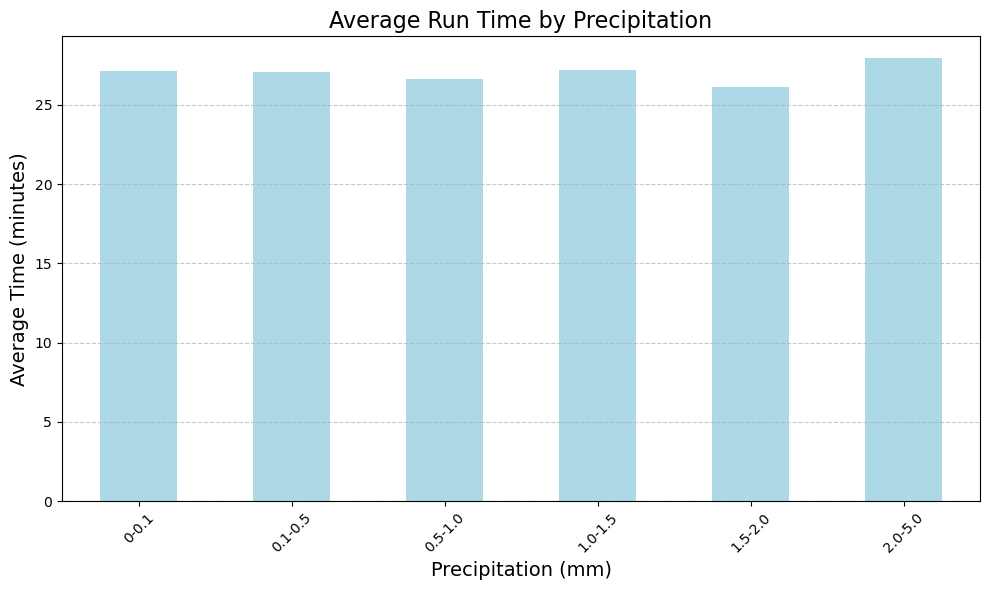

In [17]:
df = precip_bins(df)

# Define precipitation bins
bins = [0, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0]
labels = ['0-0.1', '0.1-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-5.0']
df['precip_bins'] = pd.cut(df['precipitation'], bins=bins, labels=labels, include_lowest=True)

# Group by bins and calculate average times
avg_time_by_precip = df.groupby('precip_bins')['Time_in_minutes'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
avg_time_by_precip.plot(kind='bar', color='lightblue')

# Customize the plot
plt.title('Average Run Time by Precipitation', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Average Time (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
event_df = temp_bins(event_df)
event_df = precip_bins(event_df)

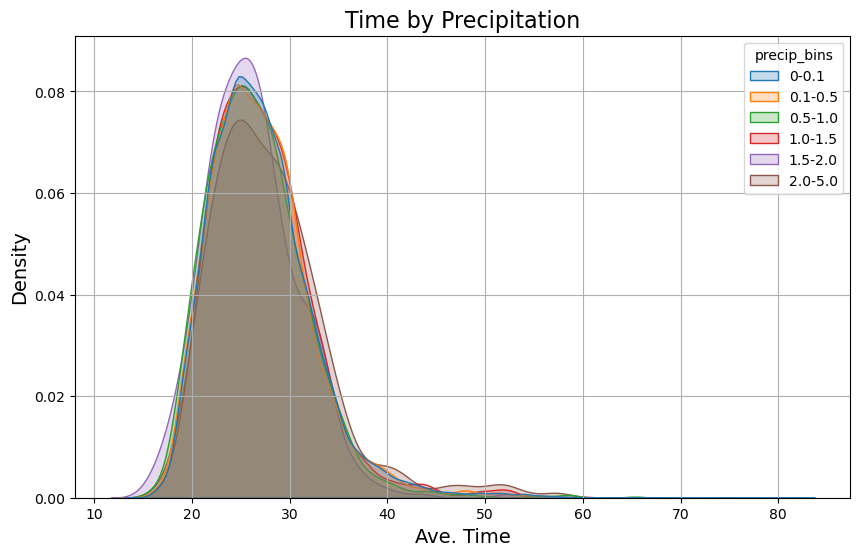

In [19]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Time_in_minutes', hue = 'precip_bins', fill=True, common_norm=False)

# Customize the plot
plt.title('Time by Precipitation', fontsize=16)
plt.xlabel('Ave. Time', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

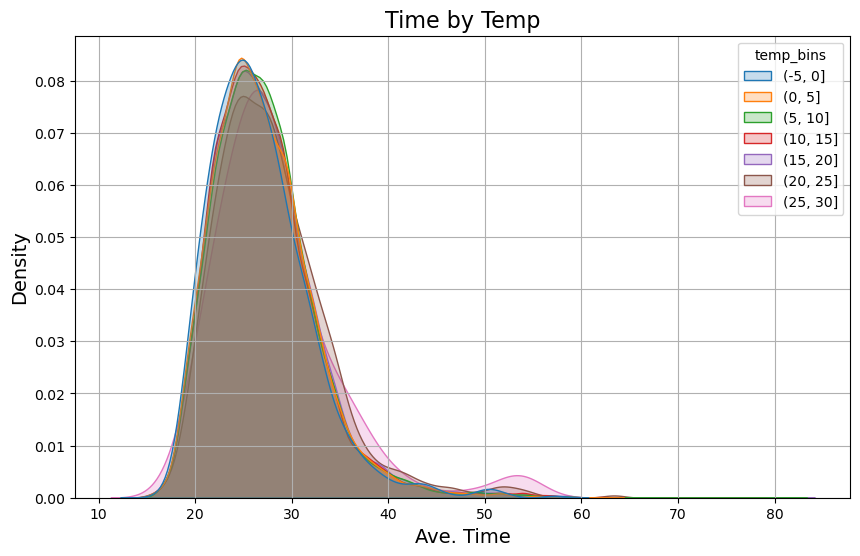

In [20]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Time_in_minutes', hue = 'temp_bins', fill=True, common_norm=False)

# Customize the plot
plt.title('Time by Temp', fontsize=16)
plt.xlabel('Ave. Time', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

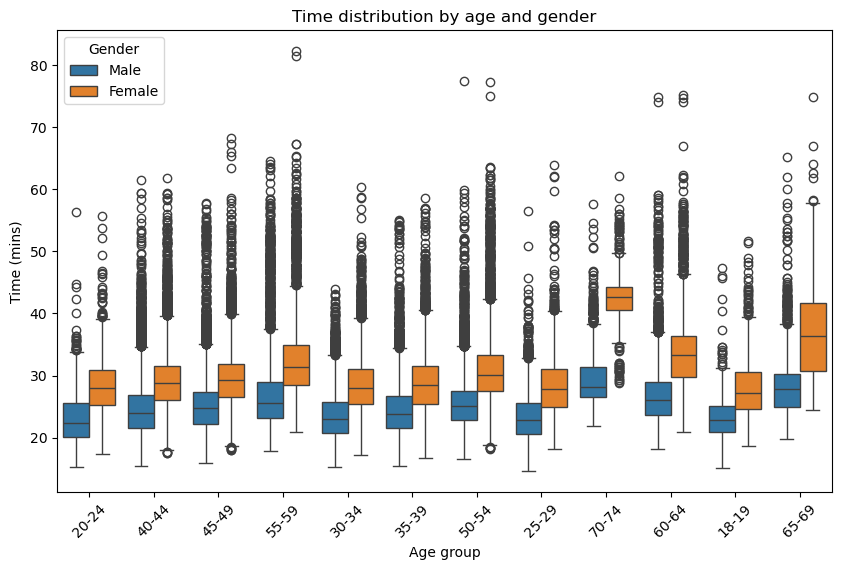

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='Time_in_minutes', hue='Gender', data=df)  # Use 'Temperature_range' if binned
plt.title('Time distribution by age and gender')
plt.xlabel('Age group')
plt.ylabel('Time (mins)')
plt.xticks(rotation=45)
plt.show()

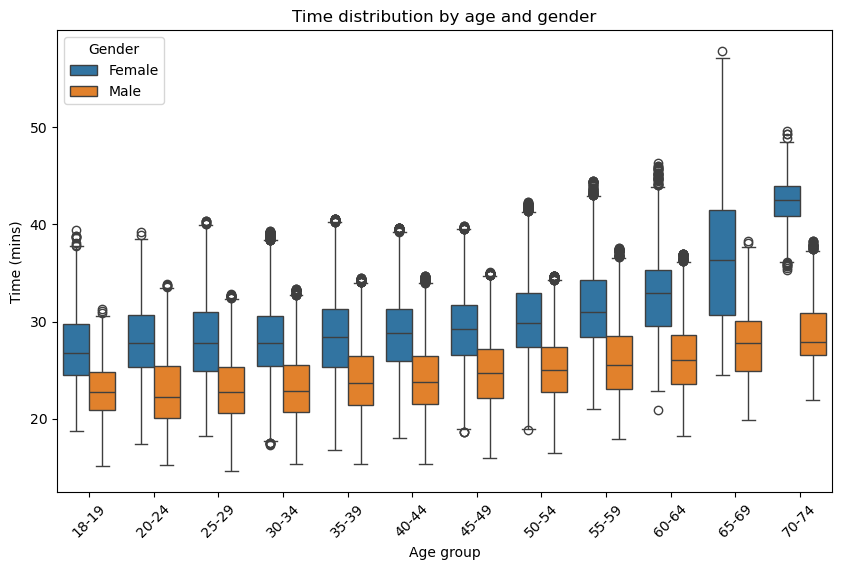

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='Time_in_minutes', hue='Gender', data=filt_df)  # Use 'Temperature_range' if binned
plt.title('Time distribution by age and gender')
plt.xlabel('Age group')
plt.ylabel('Time (mins)')
plt.xticks(rotation=45)
plt.show()

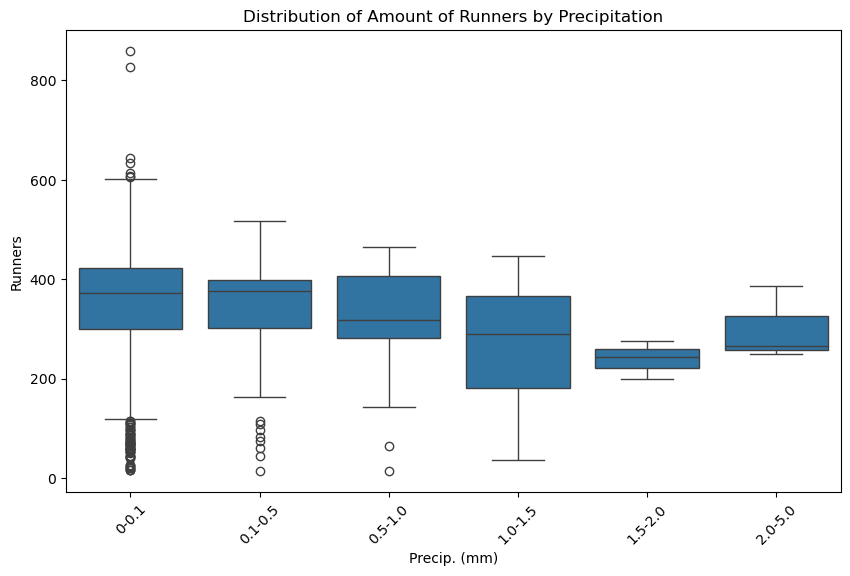

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='precip_bins', y='Total_event_runners', data=event_df)  # Use 'Temperature_range' if binned
plt.title('Distribution of Amount of Runners by Precipitation')
plt.xlabel('Precip. (mm)')
plt.ylabel('Runners')
plt.xticks(rotation=45)
plt.show()

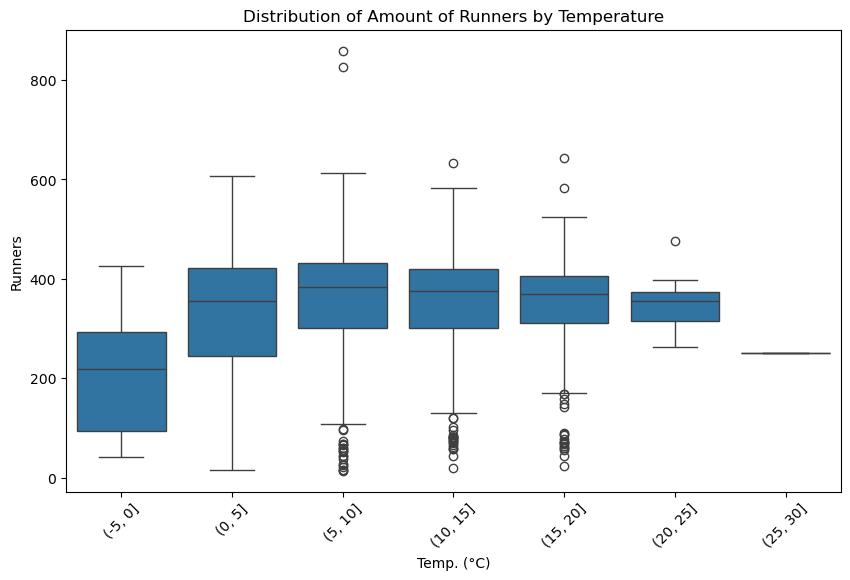

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp_bins', y='Total_event_runners', data=event_df)  # Use 'Temperature_range' if binned
plt.title('Distribution of Amount of Runners by Temperature')
plt.xlabel('Temp. (°C)')
plt.ylabel('Runners')
plt.xticks(rotation=45)
plt.show()

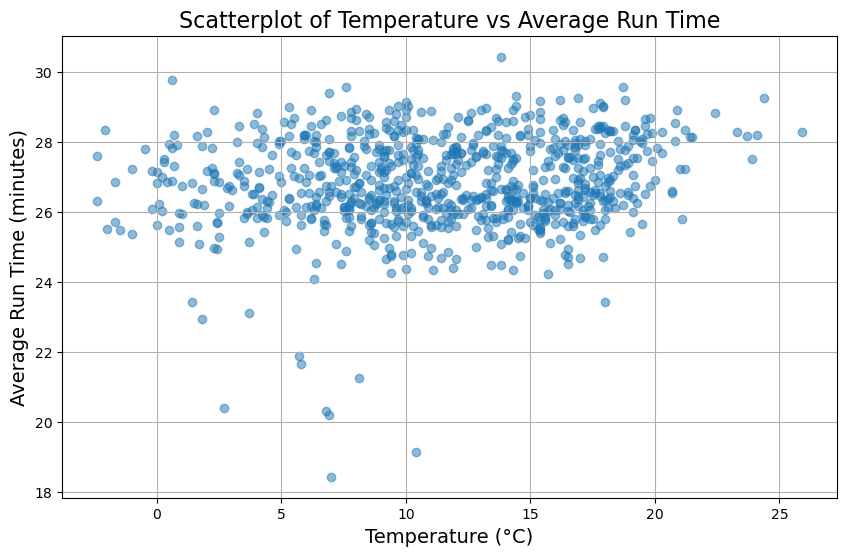

In [25]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(event_df['temperature'], event_df['ave_run_time'], alpha=0.5)

# Customize the plot
plt.title('Scatterplot of Temperature vs Average Run Time', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Average Run Time (minutes)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

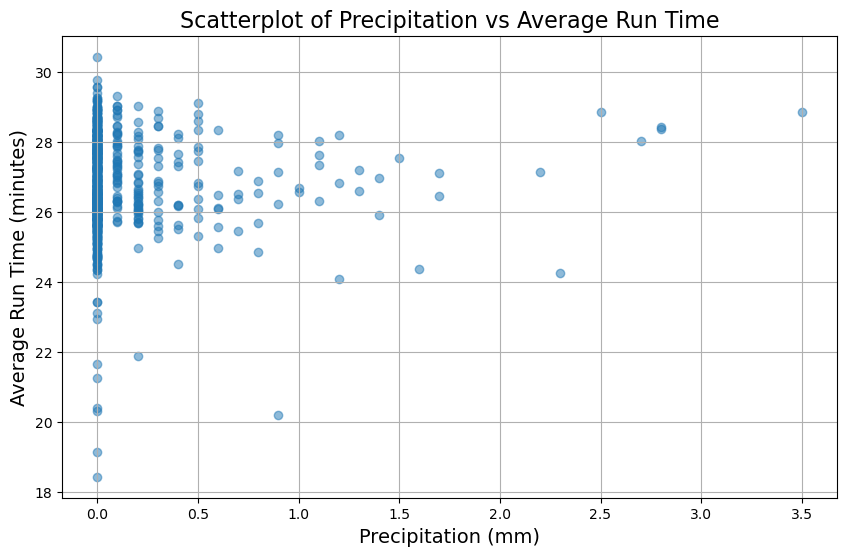

In [26]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(event_df['precipitation'], event_df['ave_run_time'], alpha=0.5)

# Customize the plot
plt.title('Scatterplot of Precipitation vs Average Run Time', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Average Run Time (minutes)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

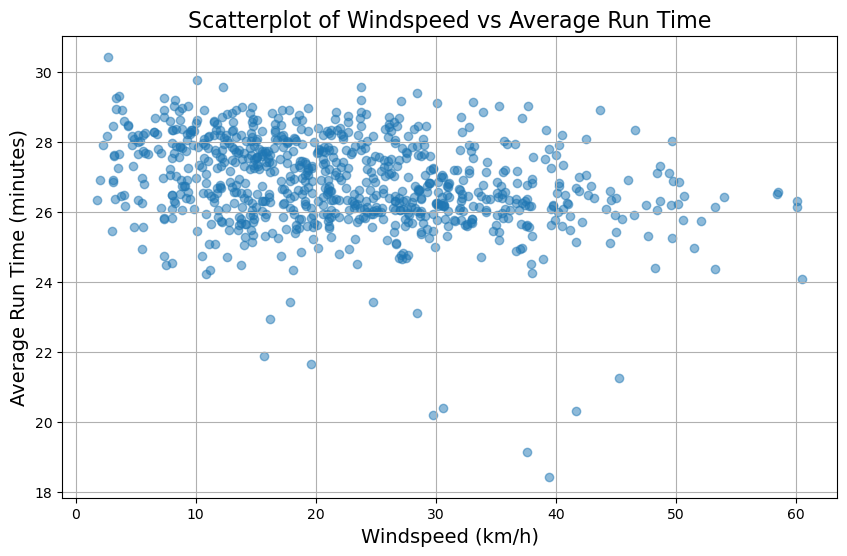

In [27]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(event_df['windspeed'], event_df['ave_run_time'], alpha=0.5)

# Customize the plot
plt.title('Scatterplot of Windspeed vs Average Run Time', fontsize=16)
plt.xlabel('Windspeed (km/h)', fontsize=14)
plt.ylabel('Average Run Time (minutes)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

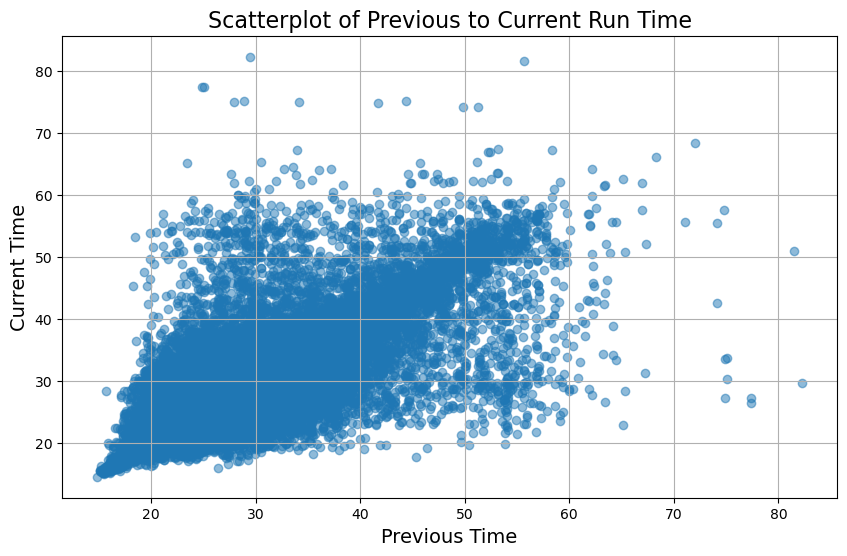

In [40]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['prev_run_time'], df['Time_in_minutes'], alpha=0.5)

# Customize the plot
plt.title('Scatterplot of Previous to Current Run Time', fontsize=16)
plt.xlabel('Previous Time', fontsize=14)
plt.ylabel('Current Time', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

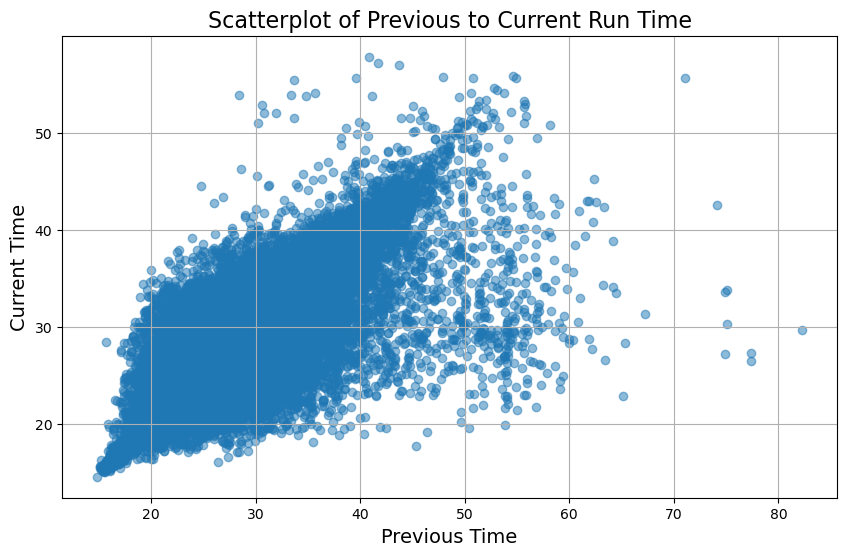

In [42]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filt_df['prev_run_time'], filt_df['Time_in_minutes'], alpha=0.5)

# Customize the plot
plt.title('Scatterplot of Previous to Current Run Time', fontsize=16)
plt.xlabel('Previous Time', fontsize=14)
plt.ylabel('Current Time', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

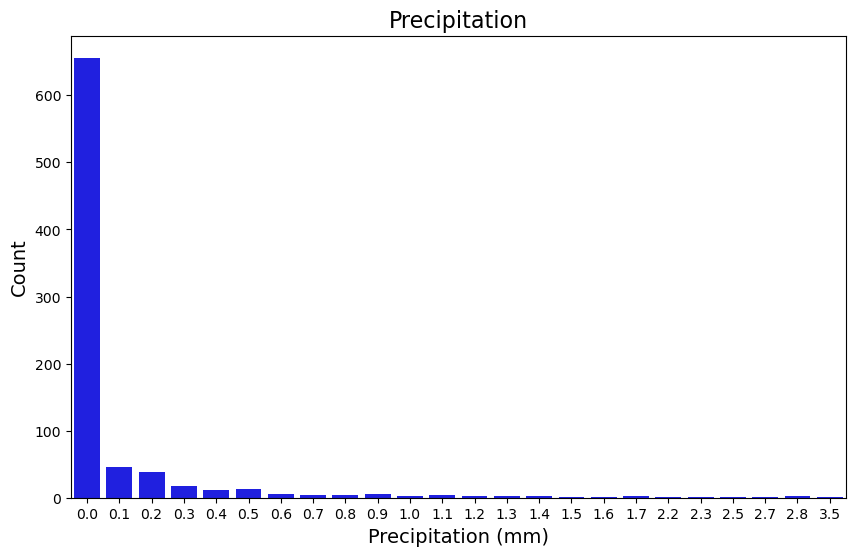

In [7]:
# Create a KDE plot
event_df['precipitation']= event_df['precipitation'].round(1)

plt.figure(figsize=(10, 6))
sns.countplot(data=event_df, x='precipitation', color='blue')

# Customize the plot
plt.title('Precipitation', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

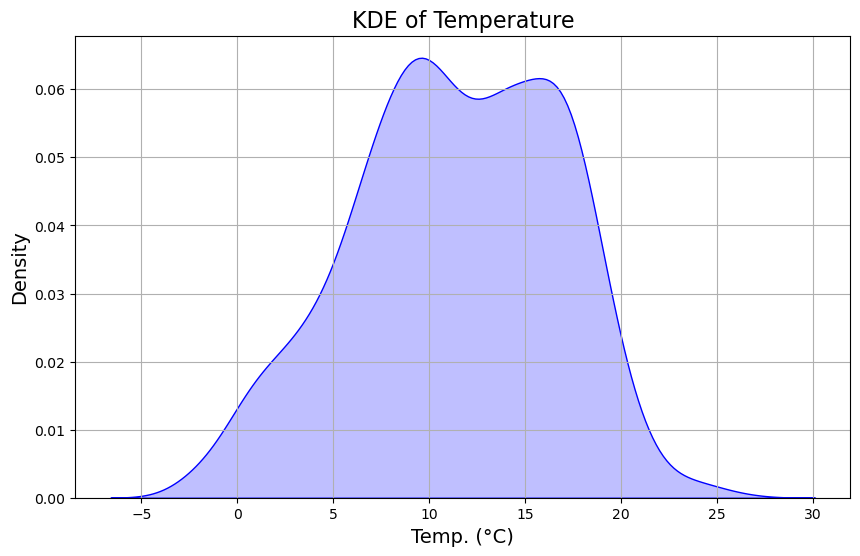

In [54]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=event_df, x='temperature', fill=True, color='blue')

# Customize the plot
plt.title('KDE of Temperature', fontsize=16)
plt.xlabel('Temp. (°C)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()